## Airbnb in Amsterdam 

### This project involves an examination of the Airbnb properties in and around the city of Amsterdam for the purpose of developing an investment strategy, specifically to formulate a list of neighbourhoods to investigate as sites for an Airbnb. The data encompasses a comprehensive amount of information for each listing including address, neighbourhood, rental price and fees, review scores and host name and contact numbers 

In [116]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
%matplotlib inline

In [117]:
airbnb = pd.read_csv('~/Downloads/airbnb.csv')
airbnb.head()

,id,listing_url,name,host_id,street,neighbourhood,city,state,zipcode,country,...,review_scores_communication,review_scores_location,review_scores_value,bookings_per_month,high_availability,host_name,host_since,host_response_rate,host_acceptance_rate,host_is_superhost
0,6873473,https://www.airbnb.com/rooms/6873473,Amsterdam Zimmer fr 2,27280608,"Grubbehoeve, Amsterdam, holland 1103, Netherlands",Bijlmer-Oost,Amsterdam,holland,1103,Netherlands,...,10.0,9.0,9.0,2.54,True,Petra,2/5/15,0.82,0.93,f
1,7131573,https://www.airbnb.com/rooms/7131573,"Bright room, green park, arty flat!",30039084,"Gouden Leeuw, Amsterdam Zuid-Oost, Noord-Holla...",Bijlmer-Oost,Amsterdam,Noord-Holland,1103 KX,Netherlands,...,10.0,9.0,9.0,15.00,False,Christiaan,3/26/15,1.00,1.00,f
2,1236080,https://www.airbnb.com/rooms/1236080,Studio Diemerbos,5159981,"Geerdinkhof, Amsterdam-Zuidoost, North Holland...",Bijlmer-Oost,Amsterdam,North Holland,1103 RK,Netherlands,...,NaN,NaN,NaN,NaN,False,Gerrit,2/20/13,0.00,0.00,f
3,6664829,https://www.airbnb.com/rooms/6664829,Your spot of paradise in Amsterdam!,34887518,"Kantershof, Amsterdam Zuid-Oost, Noord-Holland...",Bijlmer-Oost,Amsterdam,Noord-Holland,1104 GL,Netherlands,...,10.0,8.0,9.0,12.14,True,Tamara,6/3/15,1.00,0.93,f
4,3951418,https://www.airbnb.com/rooms/3951418,cute clean room for rent!!,20393437,"Groeneveen, Amsterdam-Zuidoost, North Holland ...",Bijlmer-Oost,Amsterdam,North Holland,1103 EK,Netherlands,...,10.0,8.0,9.0,3.58,True,Nadia,8/22/14,1.00,1.00,f


Some of the cells in the reviews per month column are empty, I would like to convert the empty space into 0 to preserve the rest of the information about these properties-( There are many such entries, around 1/6 of total. )

In [118]:
airbnb['reviews_per_month'] = airbnb['reviews_per_month'].fillna(0)

In [119]:
airbnb['review_scores_rating']=airbnb['review_scores_rating'].fillna(0)

Reviews per month is the column that gives a way to estimate how often a property is used during a month. I estimated that every other rental gave a review, so I multiplied reviews_per_month by 2 to create stays_per_month column, but this leads to situation where some properties are rented more often than possible. I decide to make stays per month equal to reviews per month. I will use review_scores_rating later but I would like all the cells filled in there as well.

Not all the rentals in Amsterdam charge a cleaning fee, but many that do not leave the column blank. I need to fill in a zero in place of the blank space. If there is a fee, it is applied once per stay.

In [120]:
airbnb['cleaning_fee']=airbnb['cleaning_fee'].fillna(0)

AirBNB helpfully provides the average days per stay in Amsterdam (3.9 days). I can use this to estimate the number of days per month a property is rented. When I look over the new column, I understand that I need to adjust the days per month to align with the calendar.

At this point, I notice that the column days_per_month shows some properties renting for more days than possible. The 3.9 days is an average number of days per stay provided by Airbnb, but I believe some properties rent for much shorter times. It makes sense to impose a max days rented to cap the days per month to 30 days. This becomes a maximum of 7.69 reviews per month.

In [121]:
airbnb['reviews_per_month'][airbnb['reviews_per_month'] > 7.69] = 7.69

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [122]:
airbnb['reviews_per_month'].describe()

count    9771.000000
mean        1.394261
std         1.531442
min         0.000000
25%         0.290000
50%         0.930000
75%         2.000000
max         7.690000
Name: reviews_per_month, dtype: float64

In [123]:
airbnb['days_per_month']= airbnb['reviews_per_month']*3.9
        

Some Airbnb properties charge an extra person fee if the number of occupants exceeds the guests included number. This fee is charged once per stay. To do this calculation , I assumed the average number of guests per rental per stay to be two people.

In [124]:
airbnb['extra_guest_fee'] = (2- airbnb['guests_included'])*airbnb['extra_people']

To arrive at the average price per day per stay I combined the price plus fees and divided by average days per stay.

In [125]:
airbnb['real_avg_price'] = ((airbnb['price']*3.9) + airbnb['extra_guest_fee'] + airbnb['cleaning_fee'])/3.9

I multiplied real average price per day by days per month rented to get to monthly income. I would like to use this column to compare properties in different Amsterdam neighborhoods.

In [126]:
airbnb['monthly_income']= (airbnb['real_avg_price'])*(airbnb['days_per_month'])

In [39]:
airbnb[['reviews_per_month','days_per_month','cleaning_fee','extra_guest_fee','real_avg_price','monthly_income']].head()


,reviews_per_month,days_per_month,cleaning_fee,extra_guest_fee,real_avg_price,monthly_income
0,1.27,4.953,0.0,35,68.974359,341.630
1,7.50,29.250,10.0,0,64.564103,1888.500
2,0.00,0.000,10.0,0,107.564103,0.000
3,6.07,23.673,15.0,0,52.846154,1251.027
4,1.79,6.981,0.0,16,40.102564,279.956


airbnb['high_availability] is a true or false column. I will convert true to 1 and false to 0 so that I can plot the data in this column.

In [127]:
airbnb['high_availability']= airbnb.high_availability.map({True:1,False:0})

Visual Analysis to get an idea of the differences among the different parts of Amsterdam. This chart shows the distribution across Amsterdam's neighbourhoods-the top four airbnb locations  are in the center or close by the center. These neighbourhoods hold half of all Airbnb listings in Amsterdam. The bottom 10 hold just one tenth of all Airbnb listings in Amsterdam. The city of Amsterdam undertook a civic reorganzation in 2010 most of the 10 are located in these areas , perhaps representing an opportunity for investors.

Text(0,0.5,'Number of Airbnb Properties')

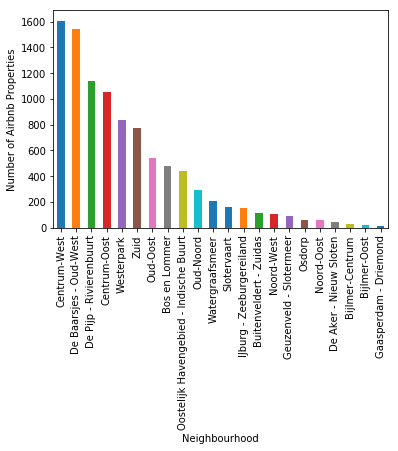

In [128]:
ax=airbnb['neighbourhood'].value_counts().plot(kind='bar');
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Number of Airbnb Properties')

I created a pivot table showing the total monthly airbnb income by neighbourhood, I will display this as a bar chart to better see what the data shows. The top neighborhoods are clustered in or near the center of Amsterdam. 

Text(0,0.5,'Total Monthly Income')

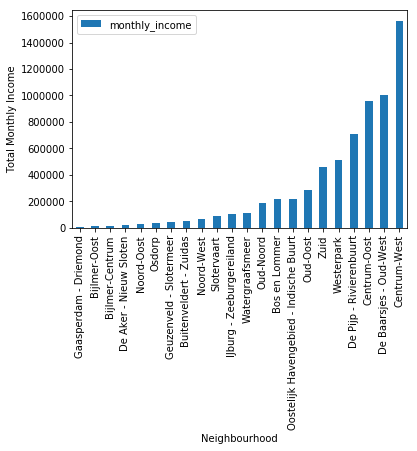

In [129]:
ax=airbnb.pivot_table(index='neighbourhood', values=['monthly_income'],aggfunc= sum).sort_values('monthly_income').plot(kind='bar');
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Total Monthly Income')

This is a table showing the average monthly income per airbnb across Amsterdam neighbourhoods. This chart is less dramatic than the sum of monthly income because the top neighbourhood have a disproportionate number of listings. While there are some differences between the average monthly incomes by neighbourhoods, those differences are much more muted.

Text(0,0.5,'Average Monthly Income')

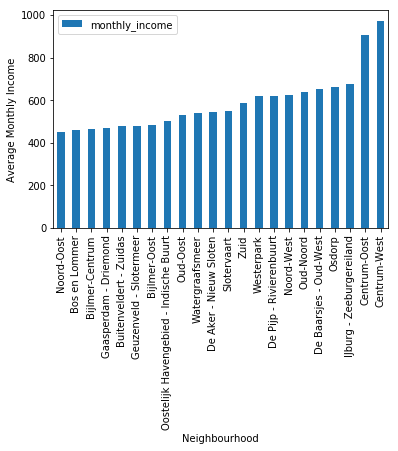

In [130]:
ax=airbnb.pivot_table(index='neighbourhood', values=['monthly_income'],aggfunc= np.mean).sort_values('monthly_income').plot(kind='bar');
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Average Monthly Income')

This table shows the computed real average price per night at an Amsterdam airbnb by neighbourhood. As one would expect, this chart is similar to the one above. The progression is even closer to linear on this chart. Airbnbers can save about 50% by staying outside of the center.

Text(0,0.5,'Average Price Per Night')

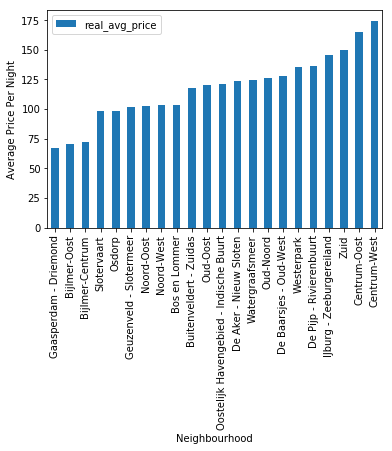

In [131]:
ax=airbnb.pivot_table(index='neighbourhood', values=['real_avg_price'],aggfunc= np.mean).sort_values('real_avg_price').plot(kind='bar');
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Average Price Per Night')

This table shows the average number of reviews/stays per month by neighbourhood. Some airbnbs on the outskirts of the city have quite high average numbers; however, the sample size is very small( the top neighbourhood is a small village with 14 Airbnbs). In 2010 Amsterdam underwent a civic reorganization, enveloping surrounding villages and reorganizing its boroughs. Some of these new areas are in the SouthEast- Bijlmer-Centrum, Biljmer-Oost, Gaasperdam-Dreimond, New West(far west) - Slotervaart, Osdorp,Geuzenweld-Slotemeer, De Aker- Nieuw Sloten and the newly constructed manmade islands east of the center Iljurg-Zeeburgereiland.The stays per month were conservatively estimated to be equal to the number of reviews a property received per month. This could be construed as a minimum, since there maybe renters that stay without reviewing, but Airbnb provides no guidance other than the reviews numbers. Almost all of the neighbourhoods range between greater than 1 and less than 2 average stays per month. It seems that Airbnbs outside the center are able to recover some of the price through volume, renting more frequently.  Properties in the center also have strong demand.

In [132]:
airbnb.pivot_table(index='neighbourhood', values=['reviews_per_month'],aggfunc= np.mean).sort_values('reviews_per_month')

,reviews_per_month
neighbourhood,
Zuid,1.128402
Oostelijk Havengebied - Indische Buurt,1.164191
Oud-Oost,1.179064
Buitenveldert - Zuidas,1.240088
Bos en Lommer,1.242725
Westerpark,1.242929
Watergraafsmeer,1.258009
De Pijp - Rivierenbuurt,1.266217
De Baarsjes - Oud-West,1.369585


Text(0,0.5,'Average Number of Reviews Per Month')

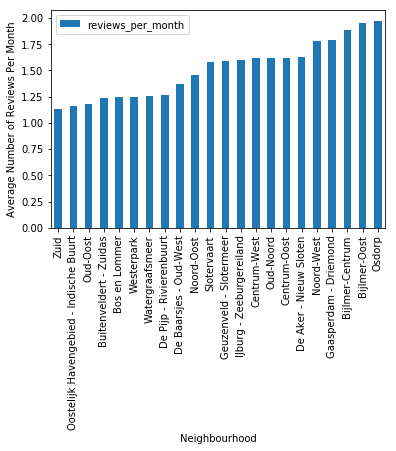

In [133]:
ax=airbnb.pivot_table(index='neighbourhood', values=['reviews_per_month'],aggfunc= np.mean).sort_values('reviews_per_month').plot(kind='bar');
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Average Number of Reviews Per Month')

Many Airbnbs in Amsterdam have zero reviews per month. For the way I estimated monthly income, this also means zero monthly income. This plot shows the airbnbs with no reviews per month by their neighbourhood. The distribution of such airbnbs is similar to the distribution of all Amsterdam Airbnbs.

Text(0,0.5,'Number of Airbnb with Zero Reviews Per Month')

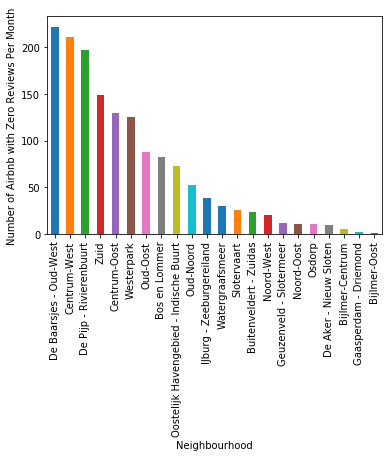

In [217]:
ax=airbnb.loc[airbnb.reviews_per_month <= 0,'neighbourhood'].value_counts().plot(kind='bar')
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Number of Airbnb with Zero Reviews Per Month')

This chart shows the property types available in Amsterdam Airbnb. The vast majority are apartments, though there are a larger number of houses are available in neighbourhoods further from the center. Though a small number, boats command a signifcant premium and are popular with Airbnbers.

In [134]:
airbnb['property_type'].value_counts()

Apartment          7779
House               936
Boat                387
Bed & Breakfast     364
Loft                 90
Condominium          74
Townhouse            51
Other                33
Villa                14
Cabin                13
Camper/RV            13
Hut                   4
Dorm                  3
Chalet                2
Bungalow              2
Yurt                  1
Tent                  1
Treehouse             1
Cave                  1
Earth House           1
Name: property_type, dtype: int64

Text(0,0.5,'Count')

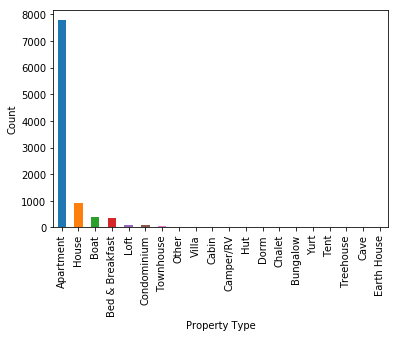

In [218]:
ax=airbnb['property_type'].value_counts().plot(kind='bar');
ax.set_xlabel('Property Type')
ax.set_ylabel('Count')

In [ ]:
This chart shows where the house Airbnbs are located. The distribution is similar to the chart of all properties.

Text(0,0.5,'Number of Houses')

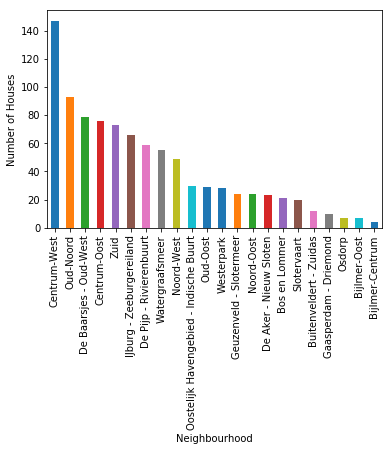

In [219]:
ax=airbnb.loc[airbnb.property_type == ('House'),'neighbourhood'].value_counts().plot(kind='bar')
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Number of Houses')

In [ ]:
This chart shows the location of the boat Airbnbs in Amsterdam. They are mostly located in the most desirable parts of the city, the outskirts have very little representation.

In [216]:
airbnb.loc[airbnb.property_type == ('Boat'),'neighbourhood'].value_counts()

Centrum-Oost                              82
Centrum-West                              69
Westerpark                                56
Oud-Noord                                 53
Oostelijk Havengebied - Indische Buurt    37
De Baarsjes - Oud-West                    24
De Pijp - Rivierenbuurt                   13
Oud-Oost                                  12
Zuid                                       9
Noord-Oost                                 9
Noord-West                                 7
Watergraafsmeer                            5
IJburg - Zeeburgereiland                   5
Buitenveldert - Zuidas                     3
Bos en Lommer                              2
De Aker - Nieuw Sloten                     1
Name: neighbourhood, dtype: int64

Text(0,0.5,'Number of Boats')

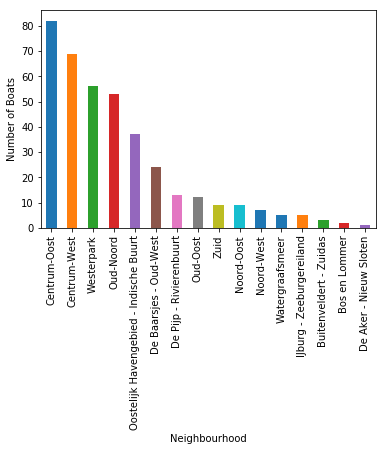

In [220]:
ax=airbnb.loc[airbnb.property_type == ('Boat'),'neighbourhood'].value_counts().plot(kind='bar')
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Number of Boats')

In [214]:
airbnb.loc[airbnb.property_type == ('Bed & Breakfast'),'neighbourhood'].value_counts()


Centrum-West                              101
De Baarsjes - Oud-West                     56
Centrum-Oost                               42
Westerpark                                 28
De Pijp - Rivierenbuurt                    22
Zuid                                       18
Oud-Noord                                  14
Oud-Oost                                   13
Oostelijk Havengebied - Indische Buurt     11
Bijlmer-Centrum                            10
Slotervaart                                 8
Noord-West                                  8
Watergraafsmeer                             6
De Aker - Nieuw Sloten                      4
Noord-Oost                                  4
Bos en Lommer                               4
Geuzenveld - Slotermeer                     4
Osdorp                                      3
IJburg - Zeeburgereiland                    3
Buitenveldert - Zuidas                      3
Bijlmer-Oost                                2
Name: neighbourhood, dtype: int64

This chart shows where the Bed and Breakfasts are in Amsterdam. I was surprised to see so many from the new areas of the city.

Text(0,0.5,'Number of Bed & Breakfasts')

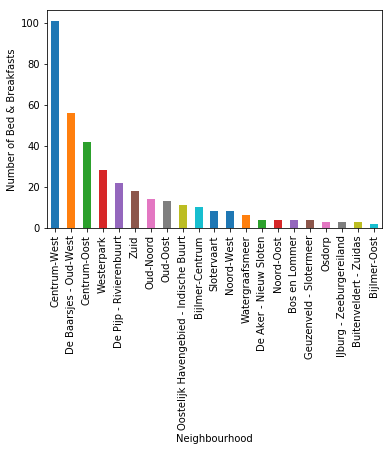

In [221]:
ax=airbnb.loc[airbnb.property_type == ('Bed & Breakfast'),'neighbourhood'].value_counts().plot(kind='bar')
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Number of Bed & Breakfasts')

This chart shows the relationship between airbnb properties with high availability defined as greater than 240 days per year and the neighbourhoods. I converted the trues to 1 and the falses to 0 and so the higher values mean a higher concentration of high availability units in a particular area. The central and most expensive and sought after units are in the middle of the graph, contrary to what I had expected. Units in the outskirts, such as the aforementioned tiny fishing village have higher numbers /higher availability.

Text(0,0.5,'Average of High Availablility Airbnbs')

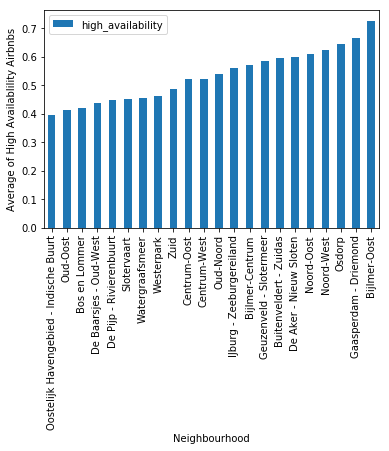

In [172]:
ax=airbnb.pivot_table(index='neighbourhood', values='high_availability',aggfunc= np.mean).sort_values('high_availability').plot(kind ='bar');
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Average of High Availablility Airbnbs')

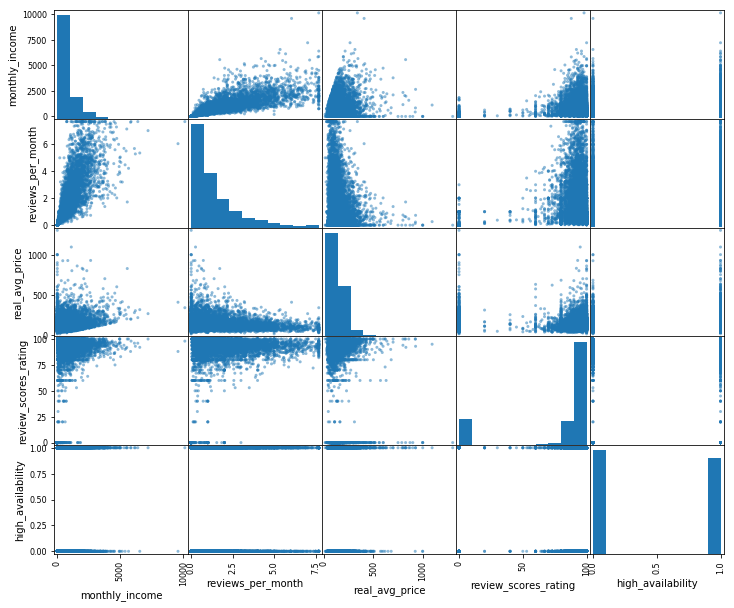

In [223]:
sm=pd.plotting.scatter_matrix(airbnb[['monthly_income','reviews_per_month','real_avg_price','review_scores_rating','high_availability']],figsize=(12,10));


This link displays property value information for Amsterdam by meter squared. We can see a quite dramatic range of property values. From an investment perspective it appears that the new areas in the New West and SouthEast property values have not yet caught up to the more established parts of the city.

from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://maps.amsterdam.nl/woningwaarde/?LANG=en")

Conclusion :This is meant to be a starting point, or a way to narrow a search for an investment property. I have had to make some assumptions, I believe them to be reasonable; however, not a replacement for real world experience. It seems that the civic reorganization and AirBNB itself have combined to create new opportunities for investment in Amsterdam. The properties in central Amsterdam and the borough West are the most numerous and from historical sales data most expensive places. The new areas in the New West( Osdorp, Slotervaart, and Geuzenveld-Slotermeer ) and in the SouthEast ( Bijlmer-Oost, Gaasperdam-Driemond, and Bijlmer-Centrum) are places where a host can offer accomodations at a discount to the center, while generating a monthly income very close to prime real estate's monthly numbers. The number of properties in these new areas is still small, compared to the center and so sample size could be an issue, this is why I suggest further investigation.